In [ ]:

from google.colab import files
 
 
uploaded = files.upload()


Saving Books.csv to Books.csv


In [1]:
import pandas as pd
df=pd.read_csv("Books.csv", usecols=['Book-Title','Publisher'])
df.dropna()
df.drop_duplicates()
df

,Book-Title,Publisher
0,Classical Mythology,Oxford University Press
1,Clara Callan,HarperFlamingo Canada
2,Decision in Normandy,HarperPerennial
3,Flu: The Story of the Great Influenza Pandemic...,Farrar Straus Giroux
4,The Mummies of Urumchi,W. W. Norton &amp; Company
...,...,...
2088,Suddenly,Mandarin
2089,The Maze,Jove Books
2090,After Dark,Jove Books
2091,The Grey Beginning,Tor Books


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph()
BookTitle = df['Book-Title']
Publisher = df['Publisher']
print('So ten sach', BookTitle.nunique())
print('So nha xuat ban', Publisher.nunique())
print('So canh', len(df))

So ten sach 2038
So nha xuat ban 608
So canh 2093


In [3]:
for index, row in df.iterrows():
    B.add_edge(row['Book-Title'], row['Publisher'], weight=1)
B.add_nodes_from(Publisher,bipartite=0)
B.add_nodes_from(BookTitle,bipartite=1)

In [4]:
##ĐỒ THỊ 2 PHÍA

<Figure size 864x864 with 0 Axes>

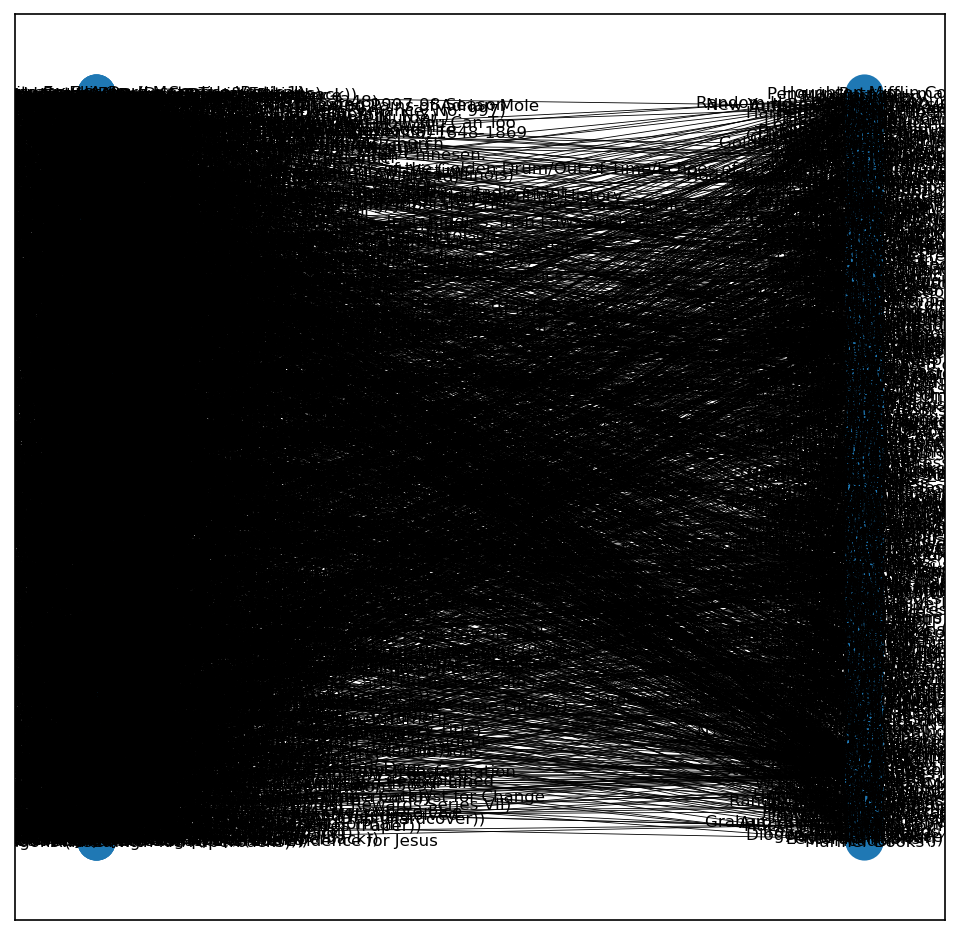

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, BookTitle),font_size=8,width=0.4)

In [6]:
df1 = pd.DataFrame(B.edges(),
                   columns=['source', 'target'])
df1.to_excel(r'dothi2p.xlsx')

In [ ]:
##ĐỒ THỊ 1 PHÍA

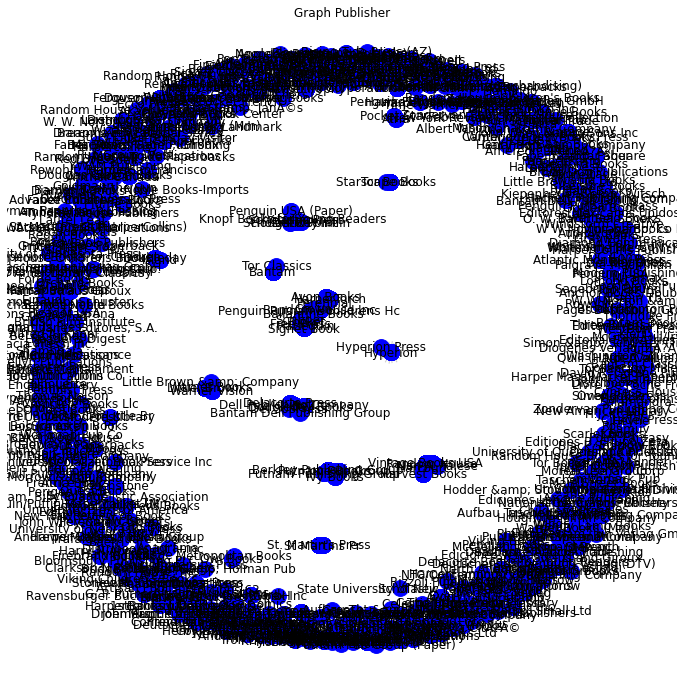

In [8]:
G = bipartite.weighted_projected_graph(B,Publisher)
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, layout,nodelist=Publisher,node_size=250,node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(Publisher, Publisher))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph Publisher")

plt.show()

In [9]:
labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    df2.to_csv (r'gelphi.csv', index = False, header=True)

C:\Users\ky dao\AppData\Local\Temp\ipykernel_13920\2046006816.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
C:\Users\ky dao\AppData\Local\Temp\ipykernel_13920\2046006816.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
C:\Users\ky dao\AppData\Local\Temp\ipykernel_13920\2046006816.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
C:\Users\ky dao\AppData\Local\Temp\ipykernel_13920\2046006816.py:4: FutureWarning: The frame.append method is deprecated and wi

In [10]:
df = pd.read_csv('gelphi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

,source,target
0,Putnam Pub Group,Jove Books
1,Putnam Pub Group,Berkley Publishing Group
2,Putnam Pub Group,Ivy Books
3,Berkley Publishing Group,Putnam Publishing Group
4,Random House,Vintage Books USA
...,...,...
81,Del Rey,Houghton Mifflin
82,Del Rey,Yearling
83,Del Rey,Scholastic Point
84,Owl Books,Metropolitan Books


In [ ]:
##LOUVAIN

<Figure size 1224x864 with 0 Axes>

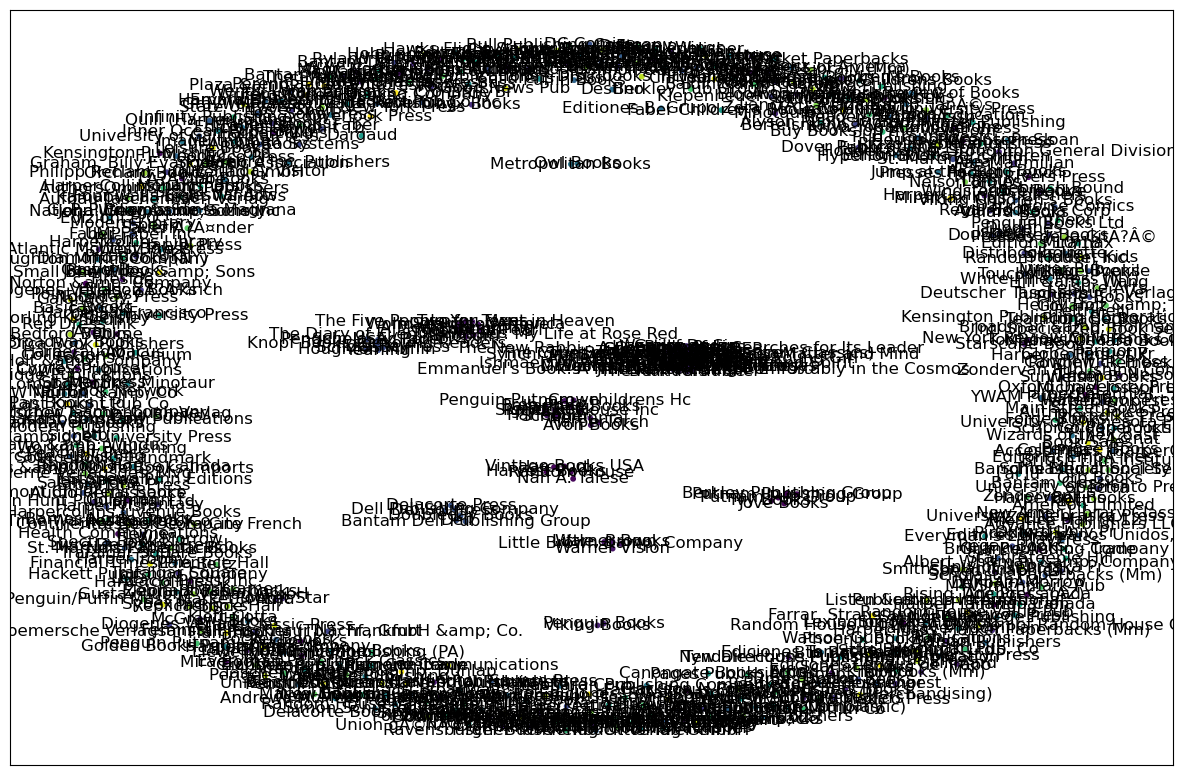

In [11]:
import matplotlib.cm as cm
from community import community_louvain


plt.figure(figsize=(17,12))

#compute the best partition
partition = community_louvain.best_partition(G)

#draw the graph
pos = nx.spring_layout(G)

#color the nodes according to their partition
fig = plt.figure(figsize = (15,10), dpi=100)

cmap = cm.get_cmap('viridis', max(partition.values())+1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=10,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [12]:
import numpy as np
values = list(partition.values())
print('Số cụm trong graph: ', len(np.unique(values)))

Số cụm trong graph:  567


In [13]:
for i in range(len(np.unique(values))):
  print("nhom",i,"*******************")
  for name, k in partition.items():
    if k==i:
      print(name)
  print("")

nhom 0 *******************
Oxford University Press

nhom 1 *******************
HarperFlamingo Canada

nhom 2 *******************
HarperPerennial

nhom 3 *******************
Farrar Straus Giroux

nhom 4 *******************
W. W. Norton &amp; Company

nhom 5 *******************
Putnam Pub Group
Berkley Publishing Group
Jove Books
Ivy Books
Putnam Publishing Group

nhom 6 *******************
Lexington-Marshall Pub.

nhom 7 *******************
Audioworks

nhom 8 *******************
Random House
Harvest Books
Harcourt
Vintage Books USA
Nan A. Talese

nhom 9 *******************
Anchor Canada

nhom 10 *******************
Emblem Editions

nhom 11 *******************
Citadel Press

nhom 12 *******************
House of Anansi Press

nhom 13 *******************
Mira Books

nhom 14 *******************
Health Communications

nhom 15 *******************
Brilliance Audio - Trade

nhom 16 *******************
Kensington Publishing Corp.

nhom 17 *******************
River City Pub

nhom 18 *************

In [14]:
for i in range(len(np.unique(values))):
  print("nhom ", i, "*****************************")
  for name, k in partition.items():
    if k == i:
      print("'", name, "'",',',end="",sep='')
  print("")

nhom  0 *****************************
'Oxford University Press',
nhom  1 *****************************
'HarperFlamingo Canada',
nhom  2 *****************************
'HarperPerennial',
nhom  3 *****************************
'Farrar Straus Giroux',
nhom  4 *****************************
'W. W. Norton &amp; Company',
nhom  5 *****************************
'Putnam Pub Group','Berkley Publishing Group','Jove Books','Ivy Books','Putnam Publishing Group',
nhom  6 *****************************
'Lexington-Marshall Pub.',
nhom  7 *****************************
'Audioworks',
nhom  8 *****************************
'Random House','Harvest Books','Harcourt','Vintage Books USA','Nan A. Talese',
nhom  9 *****************************
'Anchor Canada',
nhom  10 *****************************
'Emblem Editions',
nhom  11 *****************************
'Citadel Press',
nhom  12 *****************************
'House of Anansi Press',
nhom  13 *****************************
'Mira Books',
nhom  14 ********************

In [ ]:
#export cụm 6 ra file excel

In [15]:
cum6= df1.loc[df1['source'].isin(['Putnam Pub Group','Berkley Publishing Group','Jove Books','Ivy Books','Putnam Publishing Group'])]

In [16]:
cum6.to_csv('cum6.csv',index = False, header = True, encoding='utf-8')

In [ ]:
#Bảng chi tiết cụm Louvain

In [31]:
print('Bảng chi tiết cluster trong graph: ')
cluster_df = print_table(partition.items(), ['Node', 'Cluster'])
cluster_df

Bảng chi tiết cluster trong graph: 


,Node,Cluster
0,Oxford University Press,0
1,HarperFlamingo Canada,1
2,HarperPerennial,2
3,Farrar Straus Giroux,3
4,W. W. Norton &amp; Company,4
...,...,...
644,The Scarlet Letter,68
645,Vice,68
646,The New Rabbi : A Congregation Searches for It...,68
647,"RUSSIA HOUSE, THE",68


In [32]:
cluster_df.to_csv("louvain.csv")

In [ ]:
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

degree_dict = { node: 0 for node in G.nodes() }

for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))

degree_df = print_table(degree_dict.items(), ['Node', 'Degree'])

degree_df

,Node,Degree
0,Oxford University Press,0
1,HarperFlamingo Canada,0
2,HarperPerennial,0
3,Farrar Straus Giroux,0
4,W. W. Norton &amp; Company,0
...,...,...
644,The Scarlet Letter,1
645,Vice,1
646,The New Rabbi : A Congregation Searches for It...,1
647,"RUSSIA HOUSE, THE",1


In [ ]:
##PAGE RANK

In [ ]:
pagerank = nx.pagerank(G, tol=1e-6, alpha=0.85)
sorted_pagerank = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

pagerank_df = print_table(pagerank.items(), ['Node', 'Pagerank'])

pagerank_df

,Node,Pagerank
0,Oxford University Press,0.000838
1,HarperFlamingo Canada,0.000838
2,HarperPerennial,0.000838
3,Farrar Straus Giroux,0.000838
4,W. W. Norton &amp; Company,0.000838
...,...,...
644,The Scarlet Letter,0.003099
645,Vice,0.003099
646,The New Rabbi : A Congregation Searches for It...,0.003099
647,"RUSSIA HOUSE, THE",0.003099


In [ ]:
top_ten_max_pagerank = sorted_pagerank[:10]
print('Top 10 nhà xuất bản có Pagerank lớn nhất: ')
print_table(top_ten_max_pagerank, ['Publisher', 'Pagerank'])

Top 10 nhà xuất bản có Pagerank lớn nhất: 


,Publisher,Pagerank
0,Hyperion,0.090216
1,Bantam,0.026104
2,Pocket,0.013734
3,Ballantine Books,0.012400
4,Warner Books,0.010717
5,Knopf Books for Young Readers,0.010205
6,Del Rey,0.010205
7,Putnam Pub Group,0.009988
8,Doubleday Books,0.009214
9,Dell Publishing Company,0.009214


In [ ]:
##CLOSENESS

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
closeness_centrality_df = print_table(closeness_centrality.items(), ['Node', 'Closeness centrality'])

closeness_centrality_df

,Node,Closeness centrality
0,Oxford University Press,0.000000
1,HarperFlamingo Canada,0.000000
2,HarperPerennial,0.000000
3,Farrar Straus Giroux,0.000000
4,W. W. Norton &amp; Company,0.000000
...,...,...
644,Body of Lies,0.026626
645,JITTERBUG PERFUME,0.026626
646,The New Rabbi : A Congregation Searches for It...,0.026626
647,SLEEPING MURDER,0.026626


In [ ]:
top_ten_max_closeness_cen = sorted_closeness_centrality[:10]
print('Top 10 nhà xuất bản có Closeness centrality cao nhất: ')
print_table(top_ten_max_closeness_cen, ['Publisher', 'Closeness centrality'])

Top 10 nhà xuất bản có Closeness centrality cao nhất: 


,Publisher,Closeness centrality
0,Hyperion,0.052469
1,Hyperion Press,0.026626
2,The Beekeeper's Apprentice,0.026626
3,CAT'S EYE,0.026626
4,West of Dodge,0.026626
5,Guilty as Sin,0.026626
6,Chopping Spree,0.026626
7,The Flanders Panel,0.026626
8,Wuthering Heights,0.026626
9,"RUSSIA HOUSE, THE",0.026626


In [ ]:
bet_cen = nx.betweenness_centrality(G, normalized=False) #returns a dictionary
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)

bet_cen_df = print_table(bet_cen.items(), ['Node', 'Betweenness centrality'])

bet_cen_df

,Node,Betweenness centrality
0,Oxford University Press,0.0
1,HarperFlamingo Canada,0.0
2,HarperPerennial,0.0
3,Farrar Straus Giroux,0.0
4,W. W. Norton &amp; Company,0.0
...,...,...
644,Body of Lies,0.0
645,JITTERBUG PERFUME,0.0
646,The New Rabbi : A Congregation Searches for It...,0.0
647,SLEEPING MURDER,0.0


In [ ]:
top_ten_max_bet_cen = sorted_bet_cen[:10]
print('Top 10 nhà xuất bản có Betweenness centrality lớn nhất: ')
print_table(top_ten_max_bet_cen, ['Publisher', 'Betweenness centrality'])

Top 10 nhà xuất bản có Betweenness centrality lớn nhất: 


,Publisher,Betweenness centrality
0,Hyperion,561.0
1,Ballantine Books,39.0
2,Bantam,36.0
3,Pocket,34.0
4,Random House Inc,24.0
5,Perennial,19.0
6,Doubleday Books,7.0
7,Dell Publishing Company,7.0
8,Knopf Books for Young Readers,6.0
9,Del Rey,6.0
